In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from scipy import stats

In [8]:
from api_keys import weather_api_key
from citipy import citipy

# General Cities List

In [9]:
output_data_file = "output_data/cities.csv"
cities_wth = pd.read_csv(output_data_file)
cities_wth

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [10]:
lat_range =(-90,90)
lng_range =(-180,180)

In [11]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.00, high=90.00, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.00, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

len(cities)

595

# API Call

In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

#city_name = cities_wth["City"].tolist()

lat = []
lng = []
hum = []
contr = []
name = []
date = []
max_temp = []
wd_sp = []
cld = []

#print(json.dumps(response,indent=4))

for city in cities:
    try:
        print(f"Processing {city}.")
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        hum.append(response['main']['humidity'])
        contr.append(response['sys']['country'])
        name.append(response['name'])
        date.append(response['dt'])
        max_temp.append(response['main']['temp_max'])
        wd_sp.append(response['wind']['speed'])
        cld.append(response['clouds']['all'])
    except (KeyError):
        print("City no found. Skipping..")


Processing nazarovo.
Processing iqaluit.
Processing atuona.
Processing lincoln.
Processing upernavik.
Processing illoqqortoormiut.
City no found. Skipping..
Processing east london.
Processing karauzyak.
City no found. Skipping..
Processing mandalgovi.
Processing nikolskoye.
Processing evensk.
Processing butaritari.
Processing qasigiannguit.
Processing vaini.
Processing mataura.
Processing santa rosa.
Processing egvekinot.
Processing coquimbo.
Processing mareeba.
Processing songea.
Processing vaitupu.
City no found. Skipping..
Processing barentsburg.
City no found. Skipping..
Processing busselton.
Processing daru.
Processing saleaula.
City no found. Skipping..
Processing bambari.
Processing kapaa.
Processing katima mulilo.
Processing rikitea.
Processing cape town.
Processing qaanaaq.
Processing ushuaia.
Processing hilo.
Processing ponta do sol.
Processing sakakah.
City no found. Skipping..
Processing cascais.
Processing albany.
Processing cabo san lucas.
Processing busayra.
Processing t

City no found. Skipping..
Processing aksay.
Processing lavrentiya.
Processing tenenkou.
Processing alto araguaia.
Processing banda aceh.
Processing syracuse.
Processing sembe.
City no found. Skipping..
Processing galle.
Processing berlevag.
Processing rock sound.
Processing bonaventure.
Processing seoul.
Processing milkovo.
Processing trat.
Processing fuerte.
Processing visavadar.
Processing santa marta.
Processing ulagan.
Processing surgut.
Processing bakel.
Processing reconquista.
Processing plettenberg bay.
Processing inhambane.
Processing clyde river.
Processing bhadrachalam.
Processing rio grande.
Processing vao.
Processing moose factory.
Processing lazaro cardenas.
Processing victoria.
Processing grand gaube.
Processing rumonge.
Processing puerto escondido.
Processing adrar.
Processing asau.
City no found. Skipping..
Processing samusu.
City no found. Skipping..
Processing hualmay.
Processing bambous virieux.
Processing rawson.
Processing encruzilhada do sul.
Processing tual.
Proc

In [13]:
len(cities)

595

In [14]:
len(cld)

538

In [32]:
weather_dict = {
   "City": name,
    "Cloudiness": cld,
    "Country":contr,
    "Date": date,
    "Humidity": hum,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wd_sp
}

weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nazarovo,99,RU,1569438229,68,56.01,90.42,39.11,5.14
1,Iqaluit,75,CA,1569437984,80,63.75,-68.52,41.00,16.11
2,Atuona,88,PF,1569438080,78,-9.80,-139.03,79.79,21.52
3,Lincoln,1,US,1569438002,46,40.80,-96.67,77.00,10.29
4,Upernavik,55,GL,1569438138,83,72.79,-56.15,34.79,6.82
...,...,...,...,...,...,...,...,...,...
533,Sayyan,83,YE,1569438556,61,15.17,44.32,73.31,2.98
534,Husavik,93,CA,1569438169,69,50.56,-96.99,57.00,10.00
535,Lethem,4,GY,1569438106,41,3.38,-59.80,94.37,5.88
536,Aykhal,90,RU,1569438557,69,65.95,111.51,35.60,4.47


In [34]:
weather_data.to_csv("Weather_Cities.csv",encoding="utf-8", index=False)

# Temperature(F) vs. Latitude

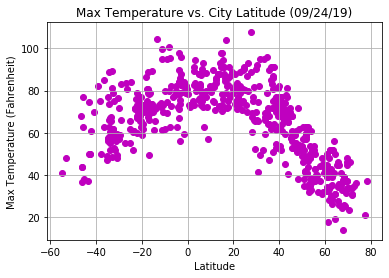

In [16]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o",color="m")

plt.title("Max Temperature vs. City Latitude (09/24/19)")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

# Humidity(%) vs. Latitude

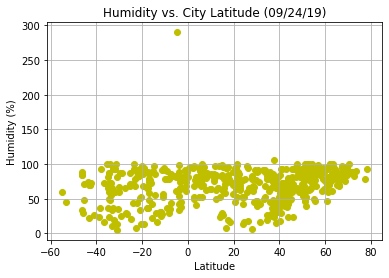

In [17]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o",color="y")

plt.title("Humidity vs. City Latitude (09/24/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

# Cloudiness vs. Latitude

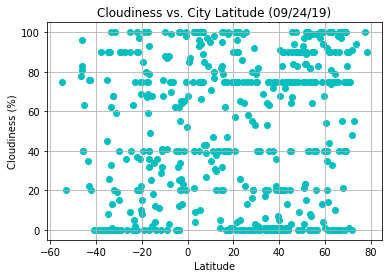

In [18]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o",color="c")

plt.title("Cloudiness vs. City Latitude (09/24/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

# Wind Speed vs. Latitude

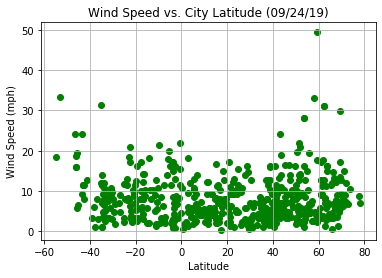

In [19]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o",color="g")

plt.title("Wind Speed vs. City Latitude (09/24/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

# Northern Hemisphere: Temperature, Humidity, Cloudiness, Wind Speed against Latitude 

In [20]:
north_hem = weather_data.loc[(weather_data["Lat"] >= 0)]
north_hem = pd.DataFrame(north_hem)
north_hem

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nazarovo,99,RU,1569438229,68,56.01,90.42,39.11,5.14
1,Iqaluit,75,CA,1569437984,80,63.75,-68.52,41.00,16.11
3,Lincoln,1,US,1569438002,46,40.80,-96.67,77.00,10.29
4,Upernavik,55,GL,1569438138,83,72.79,-56.15,34.79,6.82
6,Mandalgovi,100,MN,1569438231,23,45.76,106.27,59.09,7.34
...,...,...,...,...,...,...,...,...,...
533,Sayyan,83,YE,1569438556,61,15.17,44.32,73.31,2.98
534,Husavik,93,CA,1569438169,69,50.56,-96.99,57.00,10.00
535,Lethem,4,GY,1569438106,41,3.38,-59.80,94.37,5.88
536,Aykhal,90,RU,1569438557,69,65.95,111.51,35.60,4.47


# Northern Hemisphere -->Temperature vs. Latitude

0      48.638223
1      42.268585
3      61.155301
4      34.829112
6      57.073467
         ...    
533    82.247525
534    53.123304
535    91.950113
536    40.458094
537    52.143992
Name: Lat, Length: 367, dtype: float64
y = -0.82x +94.73
The r-squared is: -0.8300826711835297


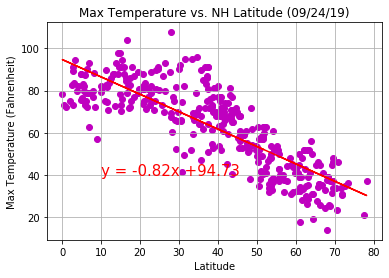

In [21]:
x_values = north_hem['Lat']
y_values = north_hem['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="m")
plt.plot(x_values,regress_values,"r-")
plt.title("Max Temperature vs. NH Latitude (09/24/19)")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
print(regress_values)
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.show()

# Northern Hemisphere --> Humidity vs. Latitude

The r-squared is: 0.18431241148623323


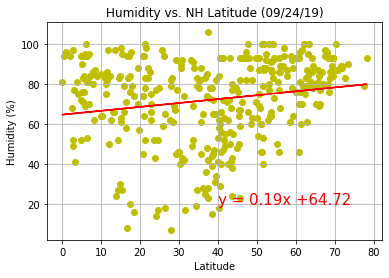

In [22]:
x_values = north_hem['Lat']
y_values = north_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="y")
plt.plot(x_values,regress_values,"r-")
plt.title("Humidity vs. NH Latitude (09/24/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

# Northern Hemisphere --> Cloudiness vs. Latitude

The r-squared is: 0.006312114012812167


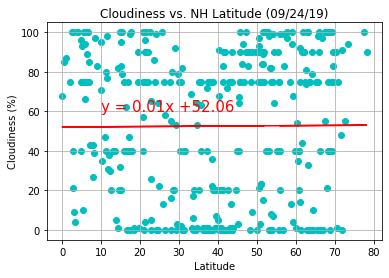

In [23]:
x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values,color="c")
plt.plot(x_values,regress_values,"r-")
plt.title("Cloudiness vs. NH Latitude (09/24/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(10,60),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

# Northern Hemisphere --> Wind Speed vs. Latitude

The r-squared is: 0.21816420164489547


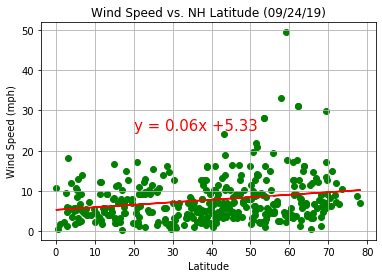

In [24]:
x_values = north_hem['Lat']
y_values = north_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color ="g")
plt.plot(x_values,regress_values,"r-")
plt.title("Wind Speed vs. NH Latitude (09/24/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

# Southern Hemisphere: Temperature, Humidity, Cloudiness, Wind Speed against Latitude

In [25]:
south_hem = weather_data.loc[(weather_data["Lat"] < 0)]
south_hem = pd.DataFrame(south_hem)
south_hem

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,Atuona,88,PF,1569438080,78,-9.80,-139.03,79.79,21.52
5,East London,0,ZA,1569438101,62,-33.02,27.91,59.00,10.29
12,Mataura,96,NZ,1569438037,84,-46.19,168.86,44.01,15.99
13,Santa Rosa,0,AR,1569438234,17,-36.62,-64.29,85.19,3.00
15,Coquimbo,40,CL,1569438236,67,-29.95,-71.34,57.20,8.05
...,...,...,...,...,...,...,...,...,...
511,Hervey Bay,90,AU,1569438062,87,-25.30,152.85,62.01,3.36
513,Touros,40,BR,1569438143,61,-5.20,-35.46,82.40,16.11
516,Paso de los Toros,0,UY,1569438547,36,-32.81,-56.52,78.80,3.36
527,Vanimo,13,PG,1569438553,79,-2.67,141.30,82.49,12.86


# Southern Hemisphere -->Temperature vs. Latitude

2      76.700693
5      63.103069
12     55.390721
13     60.994910
15     64.900860
         ...    
511    67.623898
513    79.394452
516    63.226045
527    80.876019
531    77.596661
Name: Lat, Length: 171, dtype: float64
y = 0.59x +82.44
The r-squared is: 0.5887182716039311


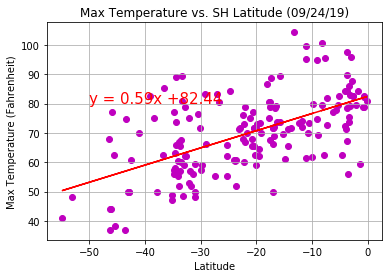

In [26]:
x_values = south_hem['Lat']
y_values = south_hem['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="m")
plt.plot(x_values,regress_values,"r-")
plt.title("Max Temperature vs. SH Latitude (09/24/19)")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
print(regress_values)
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.show()

# Southern Hemisphere --> Humidity vs. Latitude

The r-squared is: 0.1534841536474572


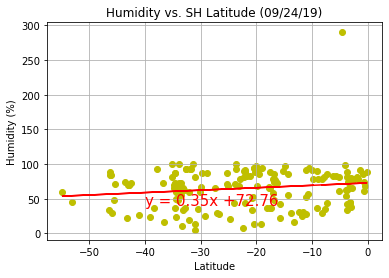

In [27]:
x_values = south_hem['Lat']
y_values = south_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="y")
plt.plot(x_values,regress_values,"r-")
plt.title("Humidity vs. SH Latitude (09/24/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

# Southern Hemisphere --> Cloudiness vs. Latitude

The r-squared is: 0.0880575745119476


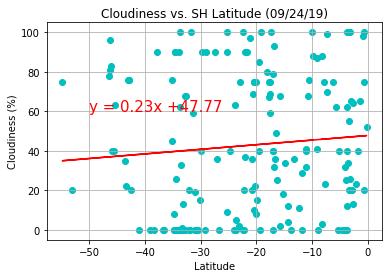

In [28]:
x_values = south_hem['Lat']
y_values = south_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values,color="c")
plt.plot(x_values,regress_values,"r-")
plt.title("Cloudiness vs. SH Latitude (09/24/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

# Southern Hemisphere --> Wind Speed vs. Latitude

The r-squared is: -0.16218697729695178


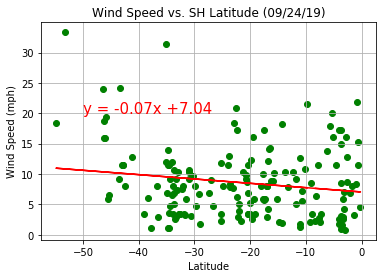

In [29]:
x_values = south_hem['Lat']
y_values = south_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color ="g")
plt.plot(x_values,regress_values,"r-")
plt.title("Wind Speed vs. SH Latitude (09/24/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()